In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl
import utils

# 1.3 Spectral analysis of a sine wave

## 1.3.1 Influence of the Parameter N
### Q1) 
We consider a sinusoid of amplitude 1 and frequency equal to 600 Hz, sampled
at 10 kHz and limited to N = 200 samples. Visualize its temporal pace and 
display its full spectrum (ie corresponding to φ ranging from 0 to 2π) on NTFD =
2048 samples. Explain the position of the lines, their pace and the value of their
amplitudes.

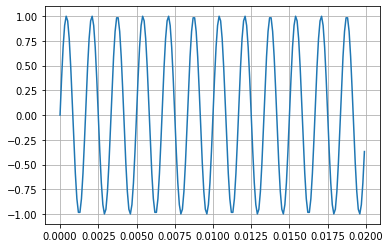

In [9]:
x, s = utils.get_sinusoid(1, 600, 10000, 200)
plt.plot(x, s)
plt.grid()

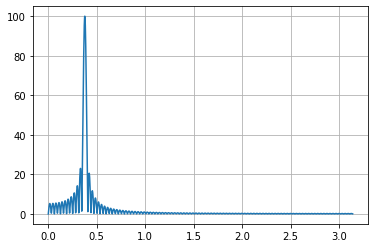

In [3]:
h, w = sgl.freqz(s, [1], worN=2048)
plt.plot(h,abs(w))
plt.grid()

## 1.3.2 Influence of the Sampling Frequency
### Q2)
We consider a sinusoid of amplitude 1 and frequency f, sampled at 10 kHz and
limited to N = 200 samples. Visualize its temporal pace, and its full spectrum
(with NTFD = 2048) for f = 600, 4400, 5000, 5600, 10600 Hz. Explain what you
observe with regard to the timing of the signal and the position of the different
lines spectrum.

It must illustrate Shannon’s theorem.

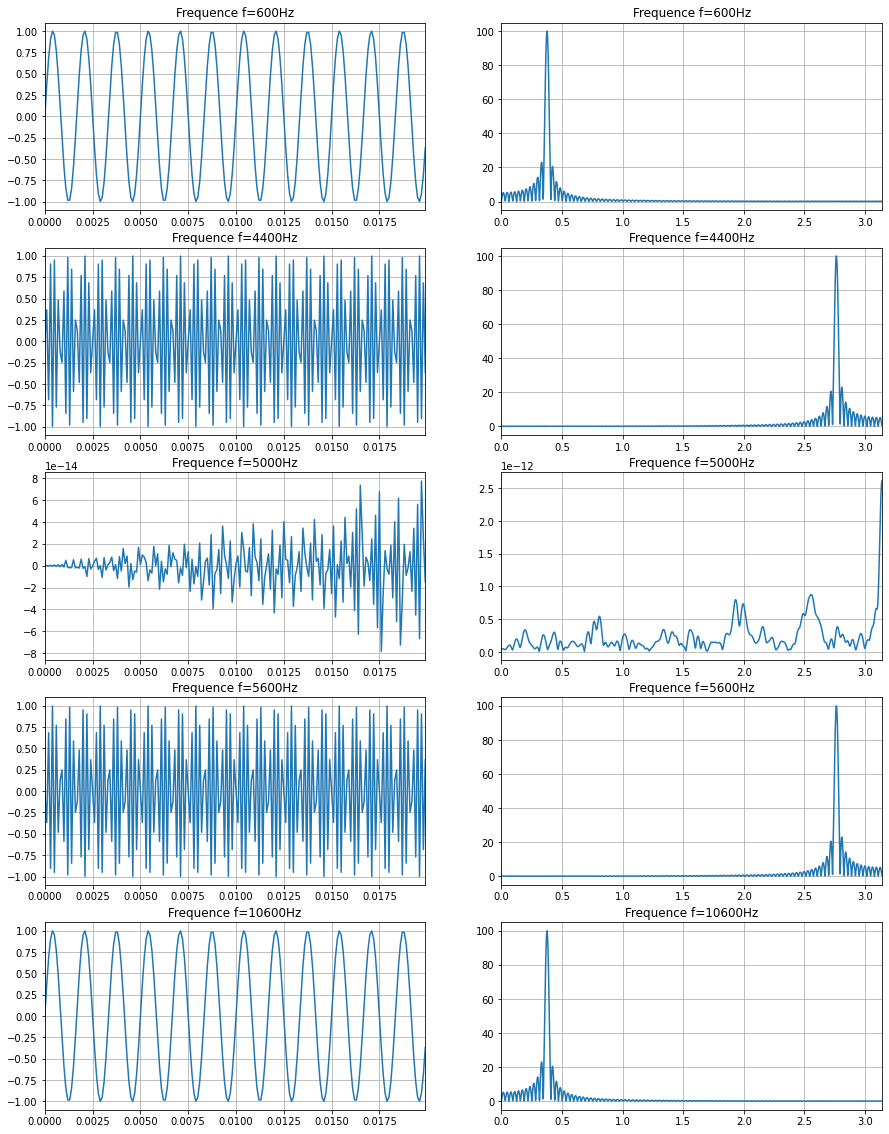

In [7]:
frequencies = [600, 4400, 5000, 5600, 10600]

plt.figure(figsize=(15, 20))

for n, freq in enumerate(frequencies):
    
    x, sinusoid = utils.get_sinusoid(1, freq, 10000, 200)
    phi, w = sgl.freqz(sinusoid, [1], worN=2048)
    
    plt.subplot(len(frequencies), 2, 2*n+1)
    plt.plot(x, sinusoid)
    plt.title(f"Frequence f={freq}Hz")
    plt.grid()
    plt.margins(x=0)
    
    plt.subplot(len(frequencies), 2, 2*n+2)
    plt.plot(phi, abs(w))
    plt.title(f"Frequence f={freq}Hz")
    plt.grid()
    plt.margins(x=0)